### MALE FEMALE BIASES CALCULATION


In [1]:
import sys 
sys.path.append('..')

import json
import glob
import traceback
from gensim.models import KeyedVectors
from calculate_distance import CalculateDistance
from calculate_bias import calculate_bias_for_all_embedding
from utils import populate_b2e_dict_for_words, change_label_to_english_at_association
from plot_utils import get_association_subplot, get_bias_plot, get_correlation_heatmap

#CHANGE BELOW TWO LINE WITH
from word_sets_asian_languages_stanford_standards import asian_languages_word_list_for_merged as word_list_ln_dict
MODEL_DIR = '../../word_embeddings/asian_ln_word_vectors/word_vectors/'

### load male, female & professional occupation wordlist

In [2]:
def remove_common_words_in_reference_group(group_1, group_2):
    group_1 = list(set(group_1))
    group_2 = list(set(group_2))
    for index_1, word_1 in enumerate(group_1):
        for index_2, word_2 in enumerate(group_2):
            if word_1 == word_2:
                group_1.pop(index_1)
                group_2.pop(index_2)
                break
    return group_1, group_2

def calculate_distance_class_instance(lang):
    
    PROFESSIONAL_OCCUPATIONS = word_list_ln_dict[lang]['pr_occupations']
    PROFESSIONAL_OCCUPATIONS_ENGLISH = word_list_ln_dict['en']['pr_occupations']
    MALE_WORDS = word_list_ln_dict[lang]['male_words']
    FEMALE_WORDS = word_list_ln_dict[lang]['female_words']
    
    PROFESSIONAL_OCCUPATIONS = [word.strip() for word in PROFESSIONAL_OCCUPATIONS]
    MALE_WORDS = [word.strip() for word in MALE_WORDS]
    FEMALE_WORDS = [word.strip() for word in FEMALE_WORDS]
    
    MALE_WORDS, FEMALE_WORDS = remove_common_words_in_reference_group(MALE_WORDS, FEMALE_WORDS)
    
    target_groups = [PROFESSIONAL_OCCUPATIONS]
    target_group_labels = ['professional_occupation']

    reference_groups = [MALE_WORDS, FEMALE_WORDS]
    reference_group_labels = ['male', 'female']
    
    
    print('target group -->')
    for group, labels in zip(target_groups, target_group_labels):
        print(labels, group)
        print('\n')
    
    print('\n')

    print('reference group -->')
    for group, labels in zip(reference_groups, reference_group_labels):
        print(labels, group)
        print('\n')
    
    
    
    calculate_association_distance = CalculateDistance()
    calculate_association_distance.set_target_word_groups(target_word_groups=target_groups, target_group_labels=target_group_labels)
    calculate_association_distance.set_reference_word_groups(reference_word_groups=reference_groups, reference_group_labels=reference_group_labels)
    
    b2e_dict = populate_b2e_dict_for_words(PROFESSIONAL_OCCUPATIONS, PROFESSIONAL_OCCUPATIONS_ENGLISH)
    
    return calculate_association_distance, b2e_dict

### Calculate associations


target group -->
professional_occupation ['管理员', '统计学家', '助产士', '法警', '拍卖师', '摄影师', '地质学家', '制鞋匠', '运动员', '出纳员', '舞者', '管家', '会计师', '物理学家', '园艺师', '牙医', '织工', '铁匠', '心理学家', '主管', '数学家', '调查员', '裁缝', '设计师', '经济学家', '机械师', '劳动者', '邮局局长', '经纪人', '化学家', '图书馆员', '服务员', '文书', '音乐家', '搬运工', '科学家', '木匠', '水手', '讲师', '警长', '飞行员', '检查员', '泥工', '贝克', '管理员', '建筑师', '收藏家', '操作员', '外科医生', '驾驶员', '画家', '导体', '护士', '厨师', '工程师', '退休', '销售', '律师', '神职人员', '内科医生', '农民', '店员', '经理', '后卫', '艺术家', '史密斯', '官方', '警察', '医生', '教授', '学生', '法官', '老师', '作者', '秘书', '士兵']




reference group -->
male ['他自己', '男', '父亲', '男性', '儿子', '侄子', '男孩', '兄弟', '男人', '叔叔', '他的', '他']


female ['她', '女性', '她自己', '姐妹', '女儿', '母亲', '女孩', '妇女', '侄女', '女人', '阿姨']




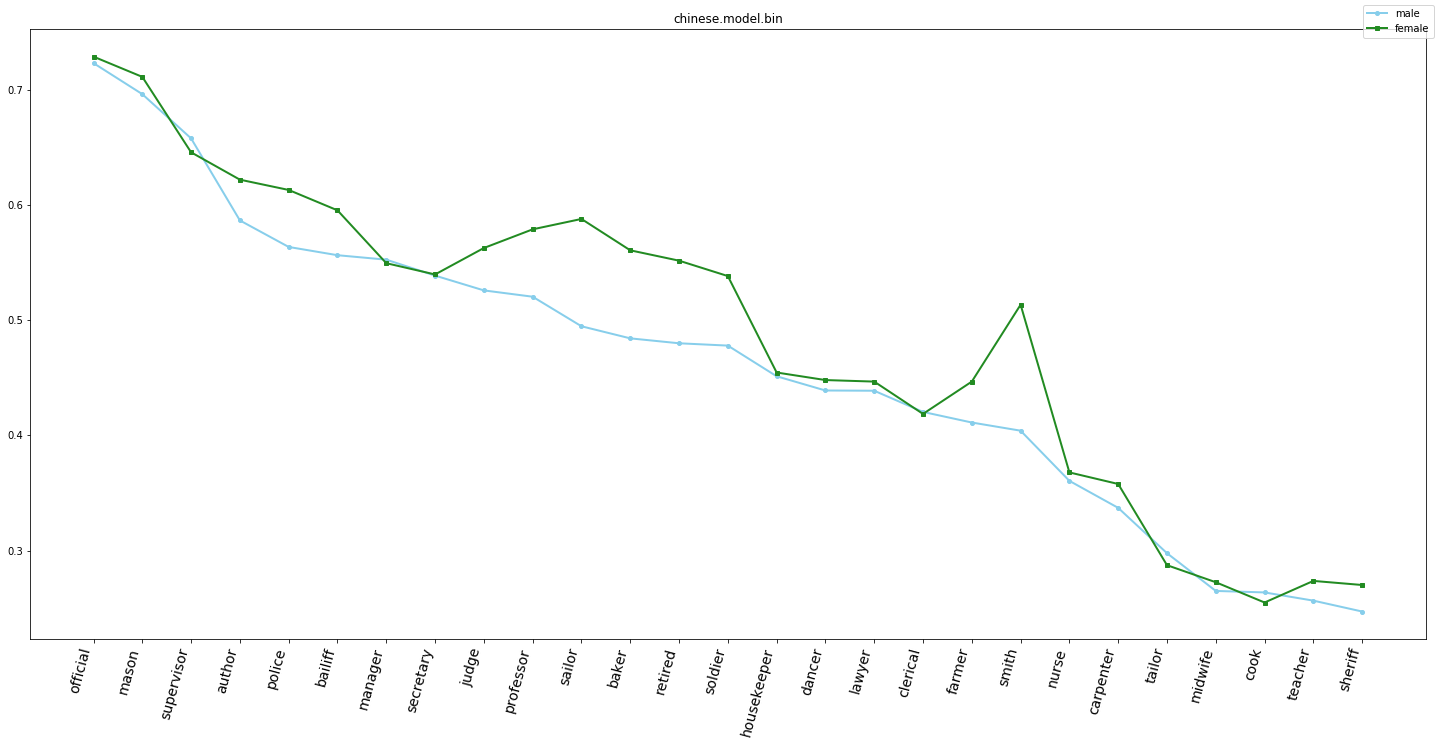

total 52 missing words for this embedding {'数学家', '搬运工', '统计学家', '运动员', '操作员', '神职人员', '物理学家', '后卫', '制鞋匠', '他的', '收藏家', '销售', '他自己', '邮局局长', '地质学家', '拍卖师', '讲师', '图书馆员', '调查员', '内科医生', '出纳员', '医生', '检查员', '艺术家', '摄影师', '心理学家', '经济学家', '工程师', '管理员', '牙医', '画家', '劳动者', '店员', '建筑师', '学生', '设计师', '园艺师', '机械师', '织工', '外科医生', '经纪人', '服务员', '她自己', '音乐家', '铁匠', '驾驶员', '化学家', '导体', '科学家', '妇女', '会计师', '飞行员'}



target group -->
professional_occupation ['管理人', '統計学者', '助産師', '執行官', '競売人', '写真家', '地質学者', '靴屋', 'アスリート', 'キャッシャー', 'ダンサー', '家政婦', '会計士', '物理学者', '庭師', '歯医者', '織工', '鍛冶屋', '心理学者', '監督者', '数学者', '調査者', 'テーラー', 'デザイナー', 'エコノミスト', 'メカニック', '労働者', 'ポストマスター', 'ブローカー', '化学者', '司書', '出席者', '事務員', 'ミュージシャン', 'ポーター', '科学者', 'カーペンター', 'セーラー', 'インストラクター', '保安官', 'パイロット', 'インスペクター', 'メイソン', 'baker', 'administrator', 'architect', 'collector', 'operator', 'surgeon', 'driver', 'painter', 'conductor', 'nurse', 'cook', 'engineer', '引退', '販売', '弁護士', '聖職者', '医師', '農夫', '書記官', 'マネージャー', 'ガード', 'アーティスト',

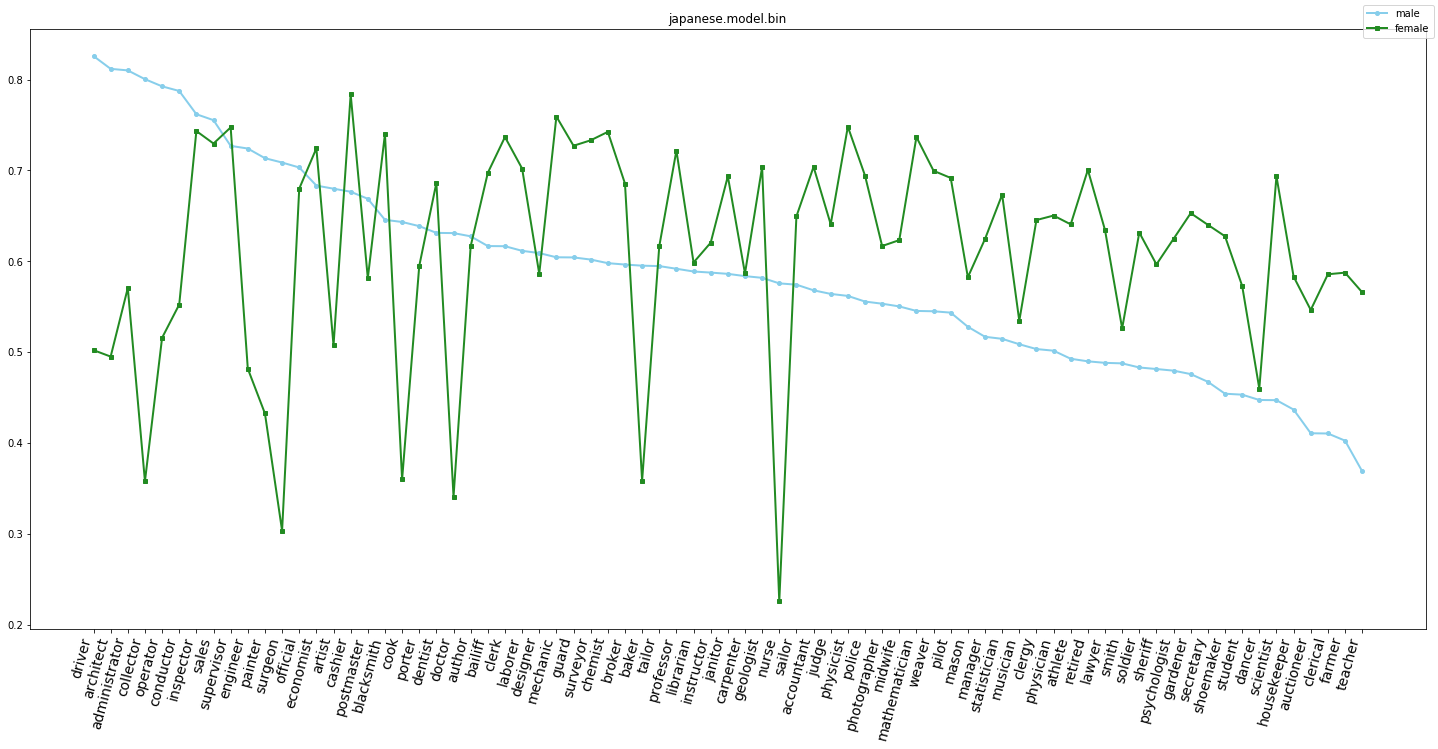

total 3 missing words for this embedding {'彼自身', '女性の', '出席者'}



target group -->
professional_occupation ['관리인', '통계 학자', '조산사', '보증인', '경매 자', '사진사', '지질 학자', '슈 메이커', '선수', '출납원', '댄서', '가계부', '회계사', '물리학 자', '정원사', '치과 의사', '위버', '대장장이', '심리학자', '감독관', '수학자', '측량사', '재단사', '디자이너', '경제학자', '기계공', '노동자', '포스트 마스터', '브로커', '화학자', '사서', '담당자', '임원', '음악가', '포터', '과학자', '목수', '선원', '강사', '셰리프', '파일럿', '검사관', '메이슨', '베이커', '관리자', '건축가', '수집가', '운영자', '외과 의사', '드라이버', '페인터', '도체', '간호사', '쿡', '엔지니어', '퇴직', '판매', '변호사', '성직자', '의사', '농부', '서기', '관리자', '가드', '아티스트', '스미스', '공식', '경찰', '박사님', '교수', '학생', '심사', '교사', '저자', '비서', '군인']




reference group -->
male ['조카', '남자', '형제', '자신의', '아들', '그', '소년', '아버지', '힘', '삼촌', '남성']


female ['이모', 'nieces', '딸', 'niece', '여성', '여자들', '어머니', '여자', '여아', '자매', '그녀']




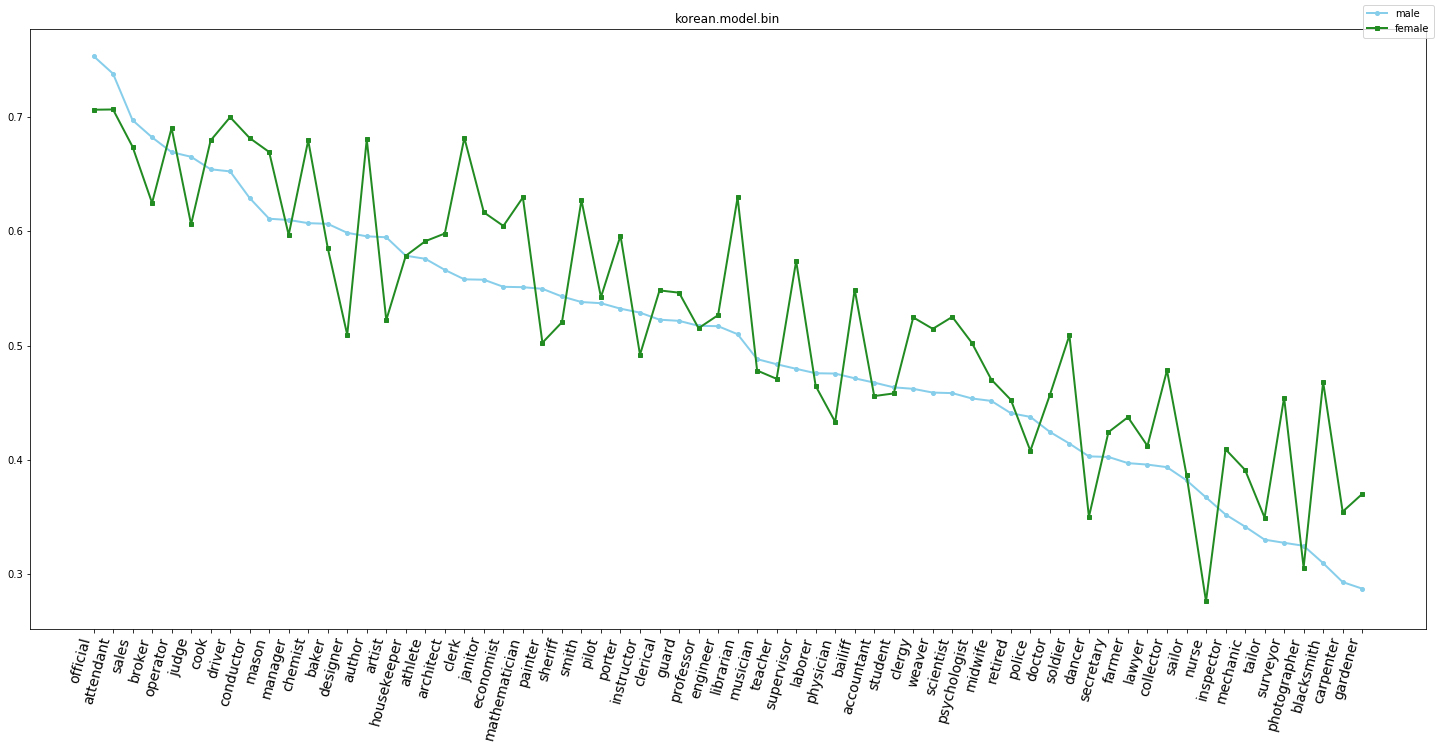

total 10 missing words for this embedding {'외과 의사', 'nieces', '물리학 자', '포스트 마스터', '경매 자', '지질 학자', '슈 메이커', '통계 학자', '치과 의사', '출납원'}



target group -->
professional_occupation ['管理人', '統計学者', '助産師', '執行官', '競売人', '写真家', '地質学者', '靴屋', 'アスリート', 'キャッシャー', 'ダンサー', '家政婦', '会計士', '物理学者', '庭師', '歯医者', '織工', '鍛冶屋', '心理学者', '監督者', '数学者', '調査者', 'テーラー', 'デザイナー', 'エコノミスト', 'メカニック', '労働者', 'ポストマスター', 'ブローカー', '化学者', '司書', '出席者', '事務員', 'ミュージシャン', 'ポーター', '科学者', 'カーペンター', 'セーラー', 'インストラクター', '保安官', 'パイロット', 'インスペクター', 'メイソン', 'baker', 'administrator', 'architect', 'collector', 'operator', 'surgeon', 'driver', 'painter', 'conductor', 'nurse', 'cook', 'engineer', '引退', '販売', '弁護士', '聖職者', '医師', '農夫', '書記官', 'マネージャー', 'ガード', 'アーティスト', 'スミス', '公式', '警察', 'doctor', '教授', '学生', '裁判官', '教師', '著者', '秘書', '兵士']




reference group -->
male ['男', 'おじさん', '男性', '少年', '兄弟', '彼', '息子', '男の子', 'おじ', '彼自身', '父', 'ne']


female ['girl', 'she', 'female', 'おばさん', ',', 'nie', '女性の', 'woman', '女性', '姉妹', 'mother', 'h

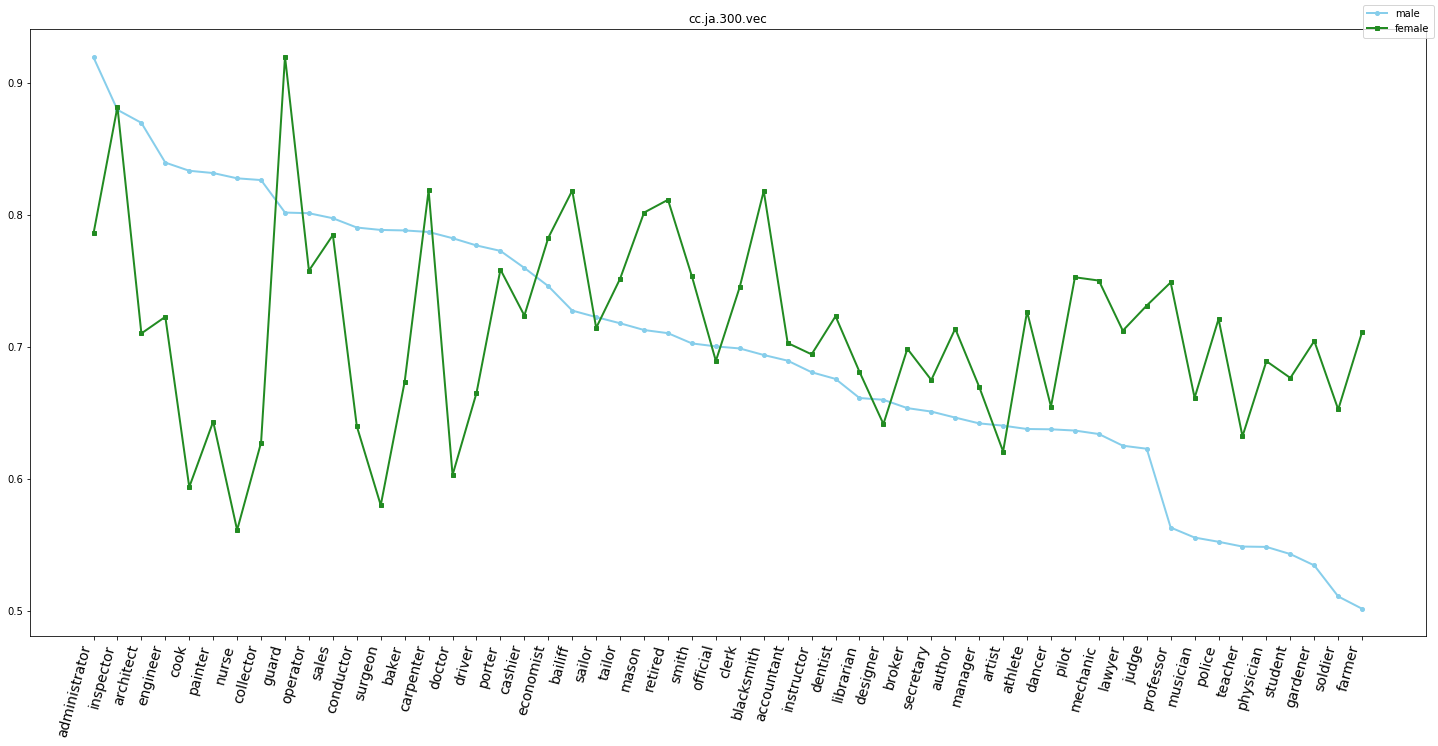

total 24 missing words for this embedding {'競売人', '保安官', '靴屋', '心理学者', '助産師', 'ポストマスター', '写真家', '統計学者', '出席者', '調査者', '織工', '家政婦', '科学者', '物理学者', '監督者', '聖職者', '彼自身', '労働者', '地質学者', '事務員', '女性の', '数学者', '管理人', '化学者'}



target group -->
professional_occupation ['관리인', '통계 학자', '조산사', '보증인', '경매 자', '사진사', '지질 학자', '슈 메이커', '선수', '출납원', '댄서', '가계부', '회계사', '물리학 자', '정원사', '치과 의사', '위버', '대장장이', '심리학자', '감독관', '수학자', '측량사', '재단사', '디자이너', '경제학자', '기계공', '노동자', '포스트 마스터', '브로커', '화학자', '사서', '담당자', '임원', '음악가', '포터', '과학자', '목수', '선원', '강사', '셰리프', '파일럿', '검사관', '메이슨', '베이커', '관리자', '건축가', '수집가', '운영자', '외과 의사', '드라이버', '페인터', '도체', '간호사', '쿡', '엔지니어', '퇴직', '판매', '변호사', '성직자', '의사', '농부', '서기', '관리자', '가드', '아티스트', '스미스', '공식', '경찰', '박사님', '교수', '학생', '심사', '교사', '저자', '비서', '군인']




reference group -->
male ['조카', '남자', '형제', '자신의', '아들', '그', '소년', '아버지', '힘', '삼촌', '남성']


female ['이모', 'nieces', '딸', 'niece', '여성', '여자들', '어머니', '여자', '여아', '자매', '그녀']


target group -->
profession

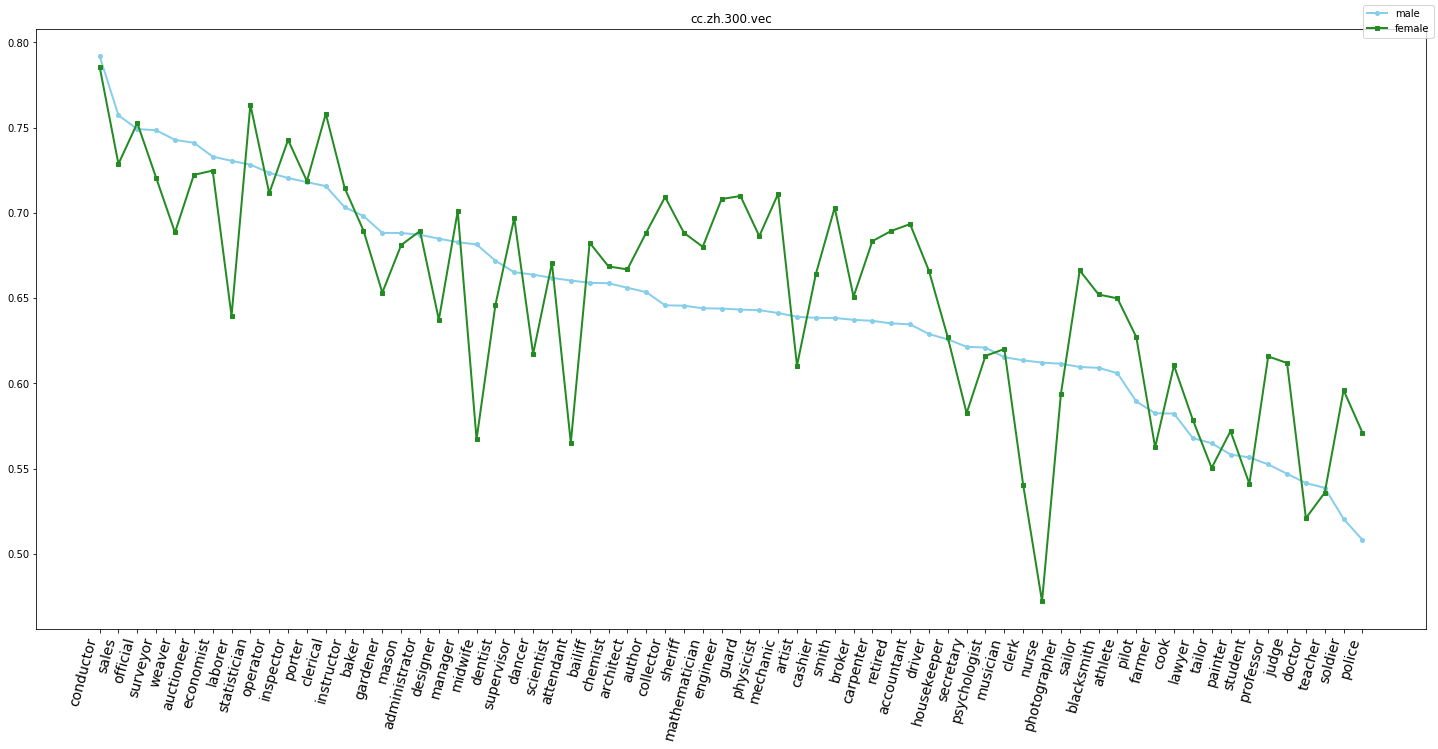

total 7 missing words for this embedding {'邮局局长', '外科医生', '地质学家', '图书馆员', '神职人员', '内科医生', '制鞋匠'}





In [3]:
association_dict = {}
model_dir = MODEL_DIR
filenames = glob.glob(model_dir + '*')
# print(filenames)
for filename in filenames:
    embedding_name = filename.split('/')[-1]
    if embedding_name[-1] == 'c':
        lang_name = embedding_name.split('.')[1]
    else:
        lang_name = embedding_name.split('.')[0]
    calculate_association_distance, b2e_dict = calculate_distance_class_instance(lang_name)
    target_wise_association_for_this_paper = {}
    try:
        if embedding_name.split('.')[-1] == 'bin':
            model = KeyedVectors.load_word2vec_format(filename, binary=True)
        else:
            model = KeyedVectors.load_word2vec_format(filename, binary=False)
    except:
        continue
    target_wise_association_for_this_embedding, missing_words = calculate_association_distance.get_association_for_provided_embedding(model=model)
    
    
    
    target_wise_association_for_this_embedding = change_label_to_english_at_association(target_wise_association_for_this_embedding, b2e_dict)
    association_dict[embedding_name] = target_wise_association_for_this_embedding
    
    
    get_association_subplot(target_wise_association_for_this_paper=target_wise_association_for_this_embedding, b2e_dict = b2e_dict, title= embedding_name)
    
    print('total {} missing words for this embedding {}'.format(len(missing_words), missing_words))
    print('\n' * 2)



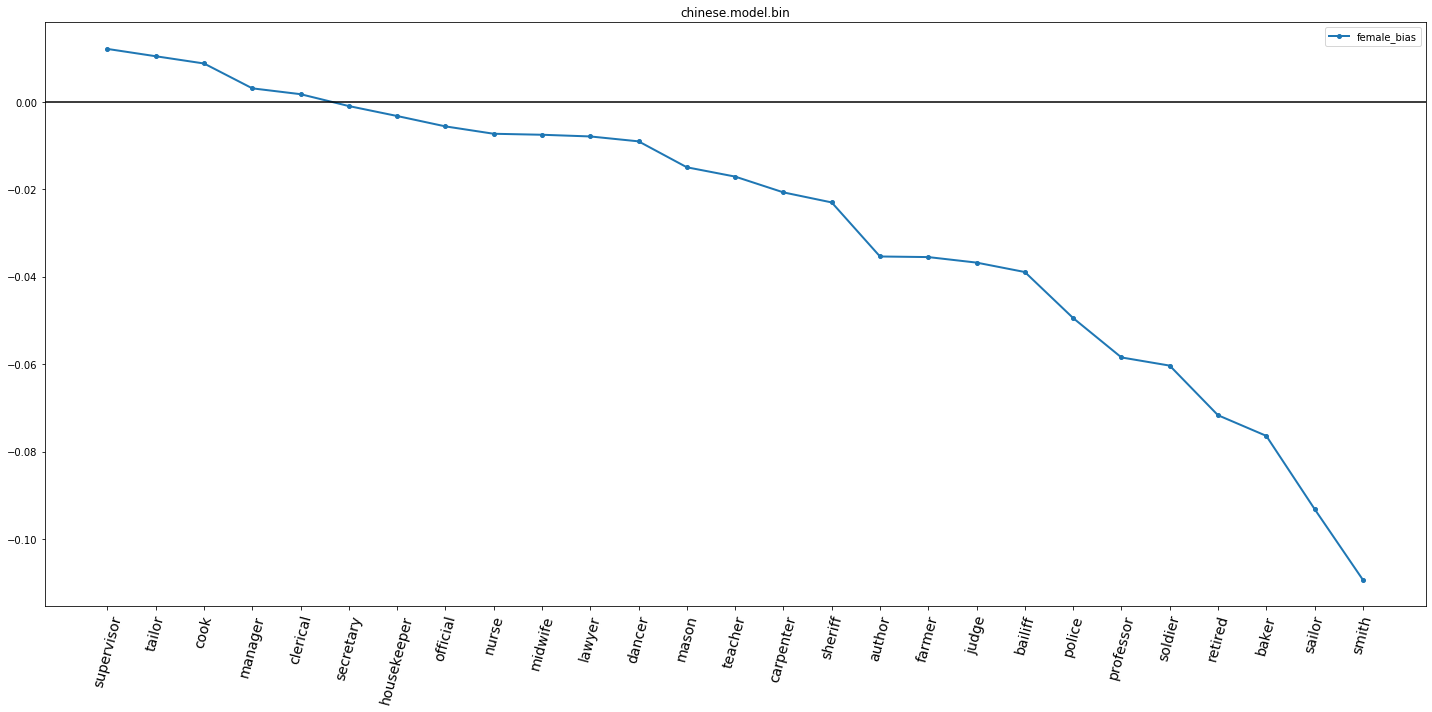

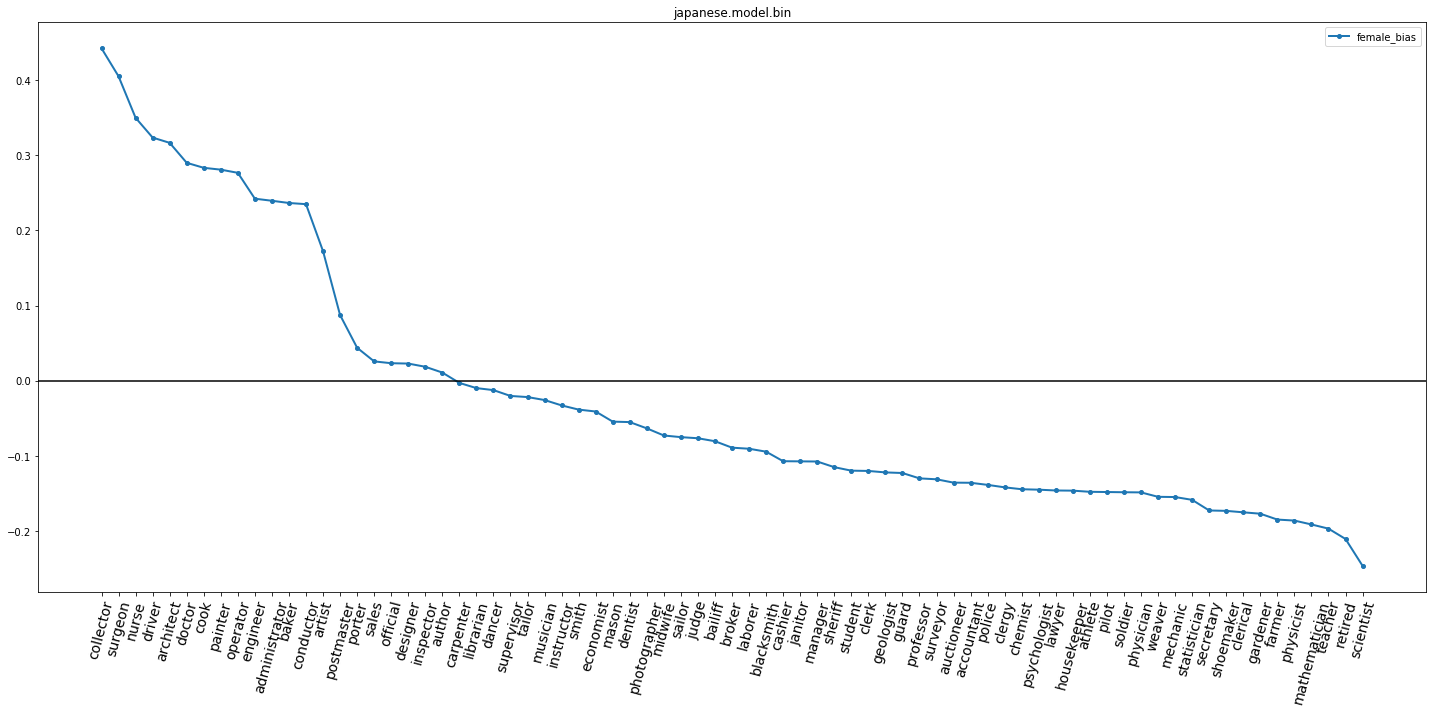

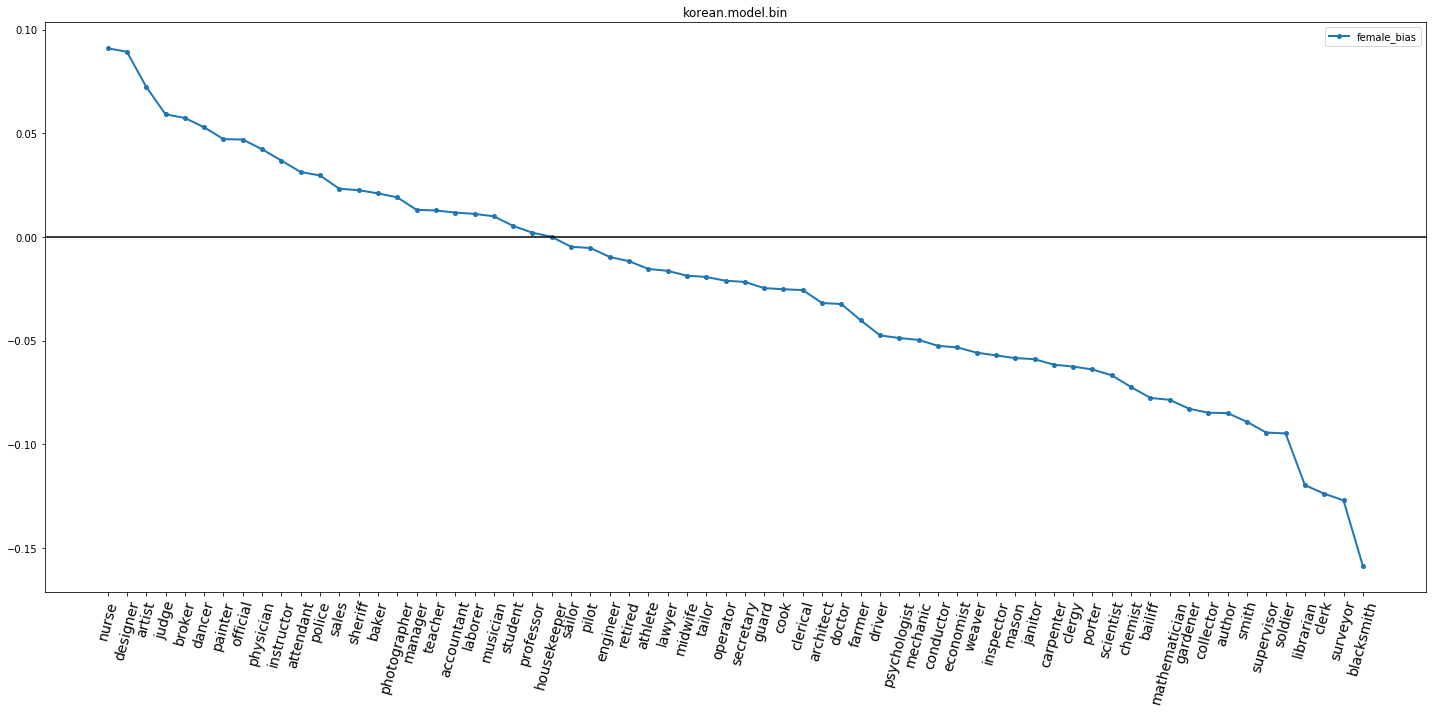

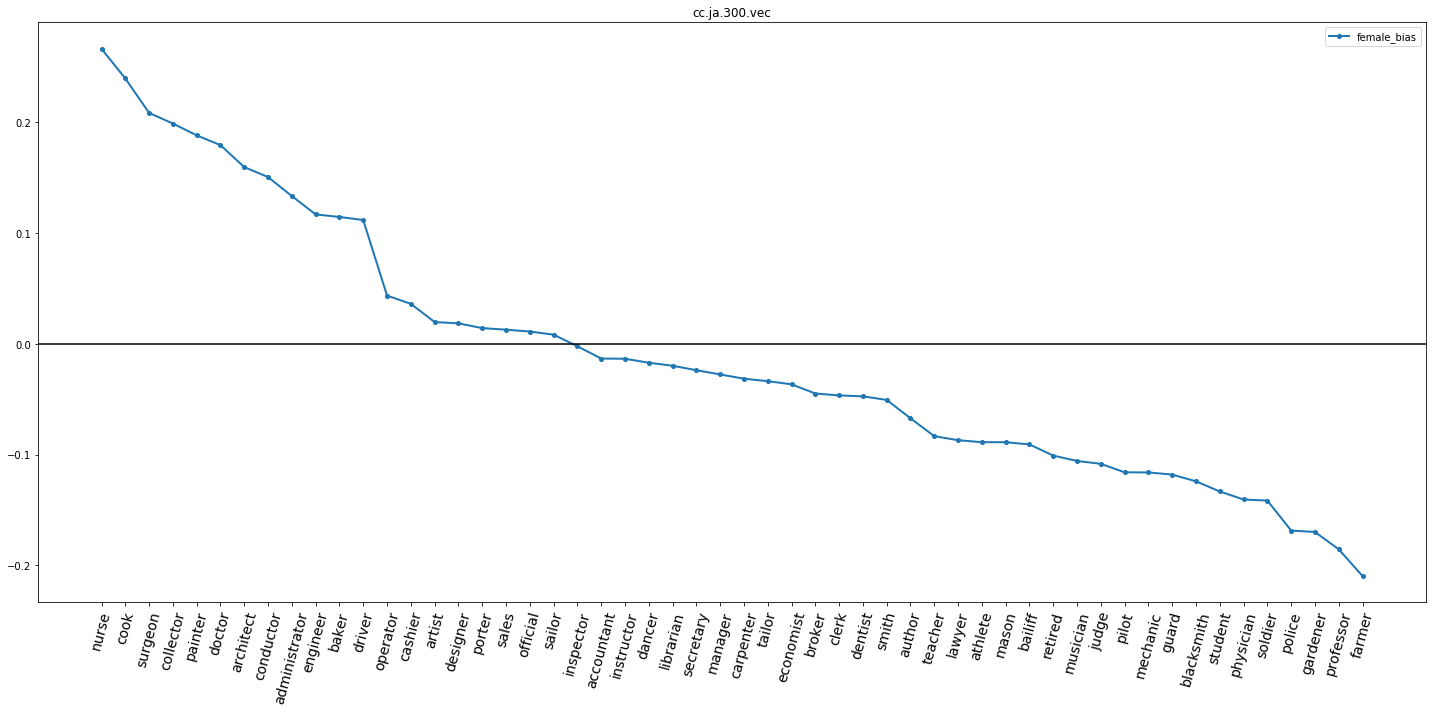

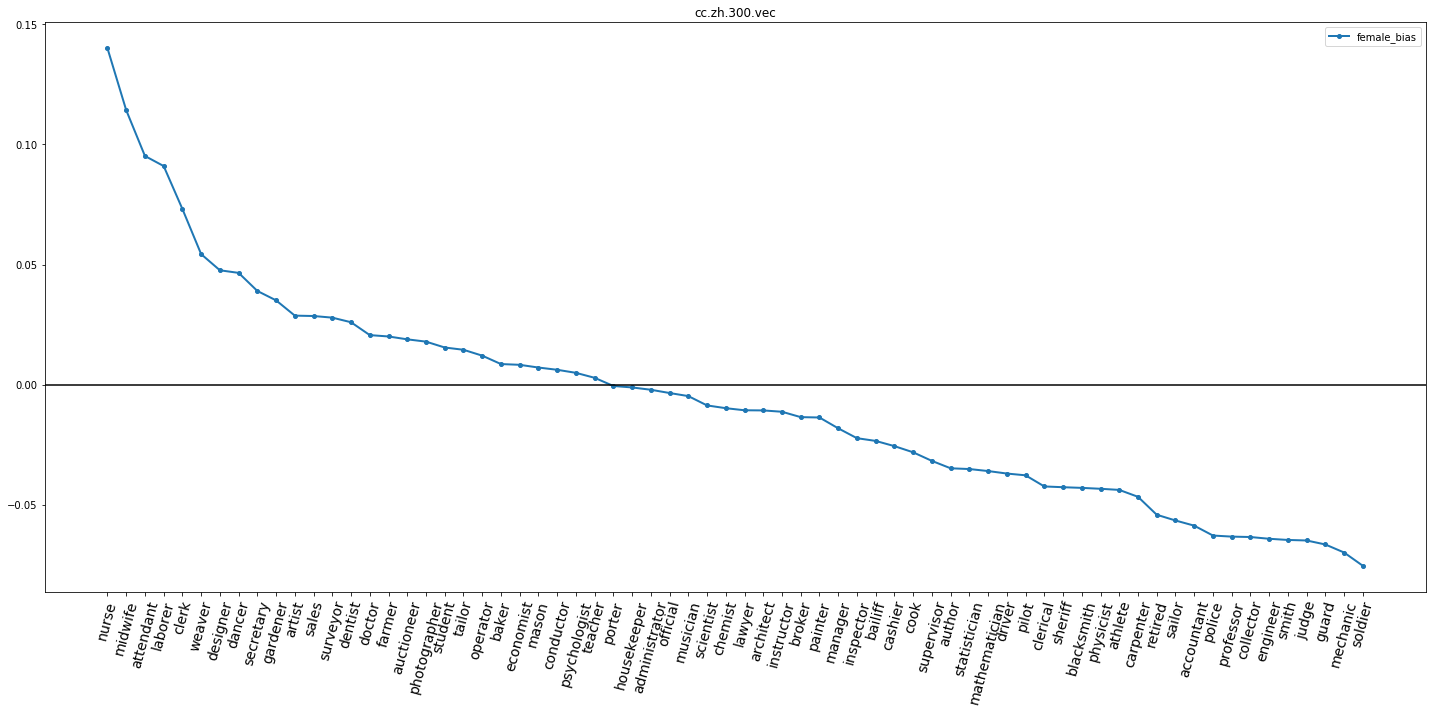

In [4]:
from plot_utils import get_bias_plot
female_bias_dict_for_all_embeddings = calculate_bias_for_all_embedding(association_dict=association_dict, 
                                                                     target_label = 'professional_occupation', 
                                                                     reference_labels = ['male', 'female'])

get_bias_plot(bias_dict=female_bias_dict_for_all_embeddings, b2e_dict=b2e_dict, bias_label = 'female_bias')

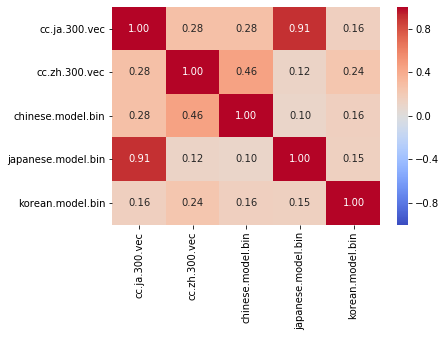

In [5]:
import pandas as pd
df = pd.DataFrame.from_dict(female_bias_dict_for_all_embeddings)
get_correlation_heatmap(df=df)